# **Estandarizacion**

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import pickle

import sys
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
sys.path.append("../../../")
from src import funciones_estandarizacion as fe

In [2]:
df = pd.read_pickle("../../../datos/cluster_2/df_nonulls_encoded_sinout.pkl").reset_index(drop=True)
print(df.shape)
df.head()

(6335, 18)


,Profit,Country,Market,Sub-Category,Quantity,Discount,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,365.64,18.168162,9.353055,14.258998,4,0.0,80.78,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,61.56,28.593333,4.509976,28.254095,2,0.0,79.47,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,209.76,23.759268,9.353055,28.254095,2,0.0,78.77,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,70.50,24.730490,4.509976,14.258998,2,0.0,77.24,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,372.48,28.737401,9.353055,14.258998,4,0.0,77.06,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [3]:
pd.set_option("display.max_columns", None)
modelos_estand = ["standar", "robust", "minmax"]

df_sin_vr = df.copy()
df_sin_vr.drop(columns=["Profit"], inplace=True)

df_estand, dic_scaler = fe.estandarizacion(df_sin_vr, df_sin_vr.columns, modelos_estand)
df_estand.head()

df_estand["Profit"] = df["Profit"]

df_estand

,Country,Market,Sub-Category,Quantity,Discount,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium,Country_standar,Market_standar,Sub-Category_standar,Quantity_standar,Discount_standar,Shipping Cost_standar,Ship Mode_First Class_standar,Ship Mode_Same Day_standar,Ship Mode_Second Class_standar,Ship Mode_Standard Class_standar,Segment_Consumer_standar,Segment_Corporate_standar,Segment_Home Office_standar,Order Priority_Critical_standar,Order Priority_High_standar,Order Priority_Low_standar,Order Priority_Medium_standar,Country_robust,Market_robust,Sub-Category_robust,Quantity_robust,Discount_robust,Shipping Cost_robust,Ship Mode_First Class_robust,Ship Mode_Same Day_robust,Ship Mode_Second Class_robust,Ship Mode_Standard Class_robust,Segment_Consumer_robust,Segment_Corporate_robust,Segment_Home Office_robust,Order Priority_Critical_robust,Order Priority_High_robust,Order Priority_Low_robust,Order Priority_Medium_robust,Country_minmax,Market_minmax,Sub-Category_minmax,Quantity_minmax,Discount_minmax,Shipping Cost_minmax,Ship Mode_First Class_minmax,Ship Mode_Same Day_minmax,Ship Mode_Second Class_minmax,Ship Mode_Standard Class_minmax,Segment_Consumer_minmax,Segment_Corporate_minmax,Segment_Home Office_minmax,Order Priority_Critical_minmax,Order Priority_High_minmax,Order Priority_Low_minmax,Order Priority_Medium_minmax,Profit
0,18.168162,9.353055,14.258998,4,0.0,80.78,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.365711,0.316102,1.230052,1.129815,-0.584694,7.512120,-0.411925,-0.245822,-0.509110,0.829990,0.982319,-0.653793,-0.486891,-0.287291,-0.661181,-0.221,0.863238,-0.118966,0.000000,3.008250,3.0,0.000000,13.428079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.562269,0.199982,0.449460,0.333333,0.000000,1.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,365.640
1,28.593333,4.509976,28.254095,2,0.0,79.47,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.733315,-0.650881,3.747184,-0.052832,-0.584694,7.379764,-0.411925,-0.245822,1.964212,-1.204834,0.982319,-0.653793,-0.486891,-0.287291,-0.661181,-0.221,0.863238,0.173256,-1.000000,7.385927,1.0,0.000000,13.202412,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.653856,0.000000,1.000000,0.111111,0.000000,0.983779,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,61.560
2,23.759268,9.353055,28.254095,2,0.0,78.77,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.562860,0.316102,3.747184,-0.052832,-0.584694,7.309039,-0.411925,-0.245822,-0.509110,0.829990,-1.017999,-0.653793,2.053847,-0.287291,-0.661181,-0.221,0.863238,0.037755,0.000000,7.385927,1.0,0.000000,13.081826,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.611388,0.199982,1.000000,0.111111,0.000000,0.975111,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,209.760
3,24.730490,4.509976,14.258998,2,0.0,77.24,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.597107,-0.650881,1.230052,-0.052832,-0.584694,7.154455,-0.411925,-0.245822,-0.509110,0.829990,0.982319,-0.653793,-0.486891,-0.287291,1.512446,-0.221,-1.158430,0.064979,-1.000000,3.008250,1.0,0.000000,12.818260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.619920,0.000000,0.449460,0.111111,0.000000,0.956166,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,70.500
4,28.737401,9.353055,14.258998,4,0.0,77.06,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.738395,0.316102,1.230052,1.129815,-0.584694,7.136268,-0.411925,-0.245822,1.964212,-1.204834,-1.017999,1.529537,-0.486891,-0.287291,-0.661181,-0.221,0.863238,0.177294,0.000000,3.008250,3.0,0.000000,12.787252,0.0,0.0,1.0,-1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.655122,0.199982,0.449460,0.333333,0.000000,0.953938,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,372.480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

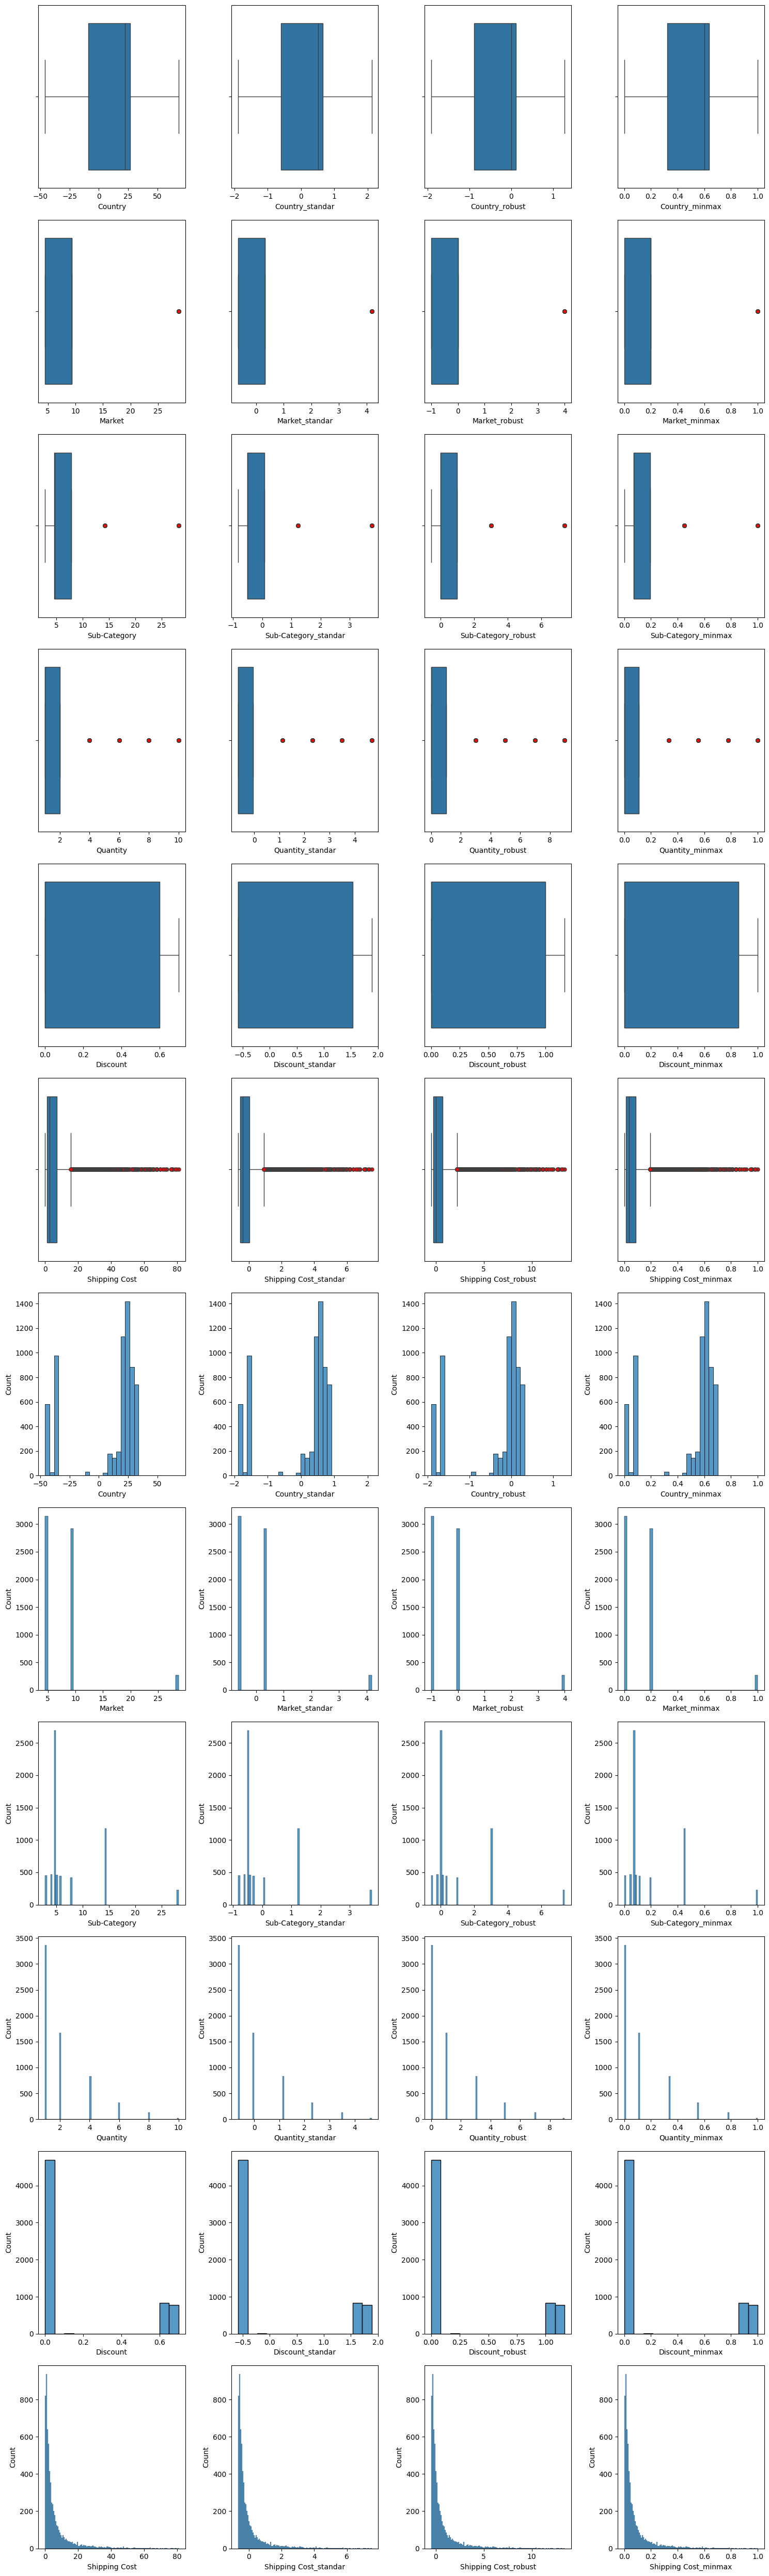

In [4]:
columnas = ['Country', 'Market', 'Sub-Category', 'Quantity', 'Discount','Shipping Cost']
fe.visualizacion_boxplot_hisplot_estand(df_estand, columnas, modelos_estand, figsize=(15,50))

En base a las distribuciones y conociendo los outliers vamos a optar como primera opción por un standar scaler.

In [5]:
scaler="standar"
vr = "Profit"

df_scaled = df_estand.loc[:, df_estand.columns.str.contains(f"{scaler}|{vr}", case=True)]

## Mover la columna de la variable respuesta al principio
df_scaled = df_scaled[[vr] + [col for col in df_scaled.columns if col != vr]]
df_scaled.columns = df_scaled.columns.str.replace(f"_{scaler}", "", regex=False)

df_scaled.head(2)

,Profit,Country,Market,Sub-Category,Quantity,Discount,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,365.64,0.365711,0.316102,1.230052,1.129815,-0.584694,7.512120,-0.411925,-0.245822,-0.509110,0.829990,0.982319,-0.653793,-0.486891,-0.287291,-0.661181,-0.221,0.863238
1,61.56,0.733315,-0.650881,3.747184,-0.052832,-0.584694,7.379764,-0.411925,-0.245822,1.964212,-1.204834,0.982319,-0.653793,-0.486891,-0.287291,-0.661181,-0.221,0.863238


Guardamos el scalres y el nuevo df:

In [6]:
with open('../../../datos/cluster_2/preprocesamiento/robust_scaler.pkl', 'wb') as f:
    pickle.dump(dic_scaler[scaler], f)

df_scaled.to_pickle("../../../datos/cluster_2/df_nonulls_encoded_sinout_scaled.pkl")